In [1]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
img = cv.imread(r"C:\Users\91896\Desktop\Face Recognition\dataset\parush\20220410_153811.jpg")
# opencv BGR channel format and plt reads images as RGB channel format

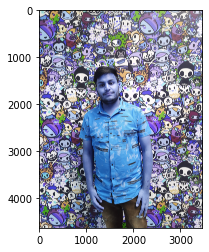

In [3]:
plt.imshow(img)

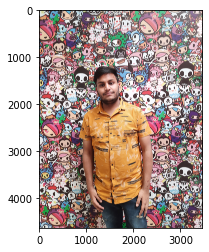

In [4]:
plt.imshow(img)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB 

In [5]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

12/12 [==============================] - 1s 28ms/step


In [6]:
results

[{'box': [1215, 1351, 462, 574],
  'confidence': 0.9999988079071045,
  'keypoints': {'left_eye': (1329, 1593),
   'right_eye': (1530, 1545),
   'nose': (1452, 1676),
   'mouth_left': (1387, 1808),
   'mouth_right': (1575, 1764)}},
 {'box': [200, 747, 62, 77],
  'confidence': 0.9837287068367004,
  'keypoints': {'left_eye': (225, 773),
   'right_eye': (251, 771),
   'nose': (239, 794),
   'mouth_left': (226, 807),
   'mouth_right': (247, 805)}},
 {'box': [2913, 958, 112, 138],
  'confidence': 0.9796766638755798,
  'keypoints': {'left_eye': (2950, 1020),
   'right_eye': (3001, 1013),
   'nose': (2983, 1050),
   'mouth_left': (2958, 1070),
   'mouth_right': (2999, 1065)}},
 {'box': [2438, 413, 155, 198],
  'confidence': 0.9679993987083435,
  'keypoints': {'left_eye': (2486, 493),
   'right_eye': (2555, 472),
   'nose': (2535, 513),
   'mouth_left': (2502, 562),
   'mouth_right': (2563, 542)}},
 {'box': [1666, 486, 42, 48],
  'confidence': 0.8972670435905457,
  'keypoints': {'left_eye': (16

In [7]:
x,y,w,h = results[0]['box']

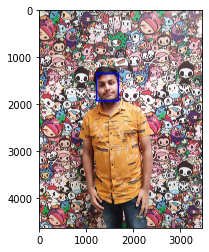

In [8]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 30)
plt.imshow(img)

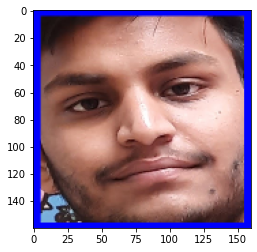

In [9]:
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160 
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

In [10]:
my_face

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

# Automate the preprocessing 


In [11]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()
#         This is the definition of the FACELOADING class,
#         which has an __init__ method to initialize the object with the given directory,
#         a target size for the face images, an empty list X to store the face images, an empty list Y to store the labels for the face images,
#         and a MTCNN object to detect faces in the images.
    

    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr
#     This method takes a filename as input,
#     loads the image using OpenCV,
#     converts the color space from BGR to RGB,
#     detects the face using the MTCNN detector,
#     extracts the face region from the image,
#     resizes the face image to the target size, 
#     and returns the resulting face array.
    

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES
#     This method takes a directory as input, loops over all the image files in the directory,
#     loads each image, extracts the face region from the image using the extract_face method,
#     and appends the resulting face image array to a list named FACES.
#     If an exception occurs during the process, the image is skipped.
#     The method then returns the list of face images.

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)
        
        return np.asarray(self.X), np.asarray(self.Y)
#     This method loops over all the subdirectories in the main directory, calls the load_faces method for each subdirectory to get the list of face images, 
#     creates a list of labels for each face image with the subdirectory name, extends the X list with the face images and the Y list with the labels,
#     and finally returns the X and Y lists as NumPy arrays.


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')
#This method creates a plot of all the

In [12]:
faceloading = FACELOADING(r"C:\Users\91896\Desktop\Face Recognition\dataset")
X, Y = faceloading.load_classes()

1/1 [==============================] - 0s 33ms/step
Loaded successfully: 10
11/11 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 34ms/step
Loaded successfully: 11
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 0s 37ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 53ms/step
Loaded successfully: 10


In [14]:
print(Y)

['aakarsh' 'aakarsh' 'aakarsh' 'aakarsh' 'aakarsh' 'aakarsh' 'aakarsh'
 'aakarsh' 'aakarsh' 'aakarsh' 'ishan' 'ishan' 'ishan' 'ishan' 'ishan'
 'ishan' 'ishan' 'ishan' 'ishan' 'ishan' 'ishan' 'parush' 'parush'
 'parush' 'parush' 'parush' 'parush' 'parush' 'parush' 'parush' 'parush'
 'sidharth' 'sidharth' 'sidharth' 'sidharth' 'sidharth' 'sidharth'
 'sidharth' 'sidharth' 'sidharth' 'sidharth' 'Tushant' 'Tushant' 'Tushant'
 'Tushant' 'Tushant' 'Tushant' 'Tushant' 'Tushant' 'Tushant' 'Tushant']


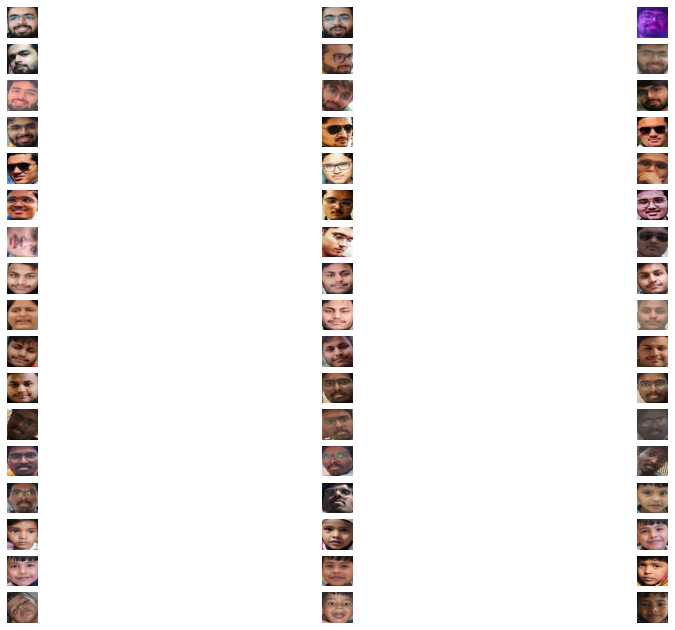

In [15]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

# FaceNet part 

In [23]:
!pip install keras-facenet

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10403 sha256=64247f3bd8a536cc17866c91cfc569bcce26fcf8b63942cd1a442c57b0712954
  Stored in directory: c:\users\91896\appdata\local\pip\cache\wheels\73\5d\41\90b5d28ca667cfc4748ae859fa4f0b85b936d73207a073ded5
Successfully built keras-facenet


In [16]:
#keras_facenet library to generate a 512-dimensional embedding vector for a given face image.
from keras_facenet import FaceNet
embedder = FaceNet()
##The get_embedding function takes a single face image as input, which is a 3D numpy array of size 160x160x3.
# It converts the input image to float32 data type and adds an extra dimension to the array using np.expand_dims
# so that the input is of size Nonex160x160x3, where None represents the batch size which is 1 in this case.
## asuming one image has 1 picture
def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0) 
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [17]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 71ms/step


In [18]:
##The np.savez_compressed() function is used to save two arrays EMBEDDED_X and Y in a compressed npz file format with the filename faces_embeddings_done_4classes.npz
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

# SVM model 


In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [20]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

Text(0, 0.5, '1')

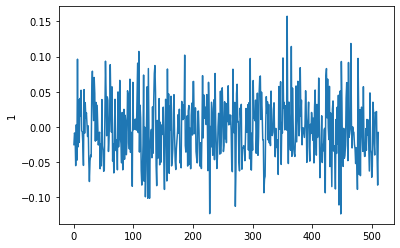

In [21]:
plt.plot(EMBEDDED_X[0]) 
plt.ylabel(Y[0])

In [ ]:
break

SyntaxError: ignored

In [22]:
Y 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [24]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [25]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

1.0

In [27]:
accuracy_score(Y_test,ypreds_test)

0.9230769230769231

In [28]:
t_im = cv.imread(r"C:\Users\91896\Desktop\Face Recognition\20220106_102547.jpg")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

7/7 [==============================] - 0s 29ms/step


In [29]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 [==============================] - 0s 93ms/step


In [30]:
test_im = [test_im]
ypreds = model.predict(test_im)

In [31]:
ypreds

array([3])

In [32]:
encoder.inverse_transform(ypreds)

array(['parush'], dtype='<U8')

In [33]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)